Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.7554 - val_loss: 0.3196
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1915 - val_loss: 0.0341
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0885 - val_loss: 0.0195
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0684 - val_loss: 0.0269
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0624 - val_loss: 0.0207
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0548 - val_loss: 0.0185
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0530 - val_loss: 0.0194
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0563 - val_loss: 0.0193
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0507 - val_loss: 0.0185
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0486 - val_loss: 0.0180
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0504 - val_loss: 0.0182
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0392 - val_l

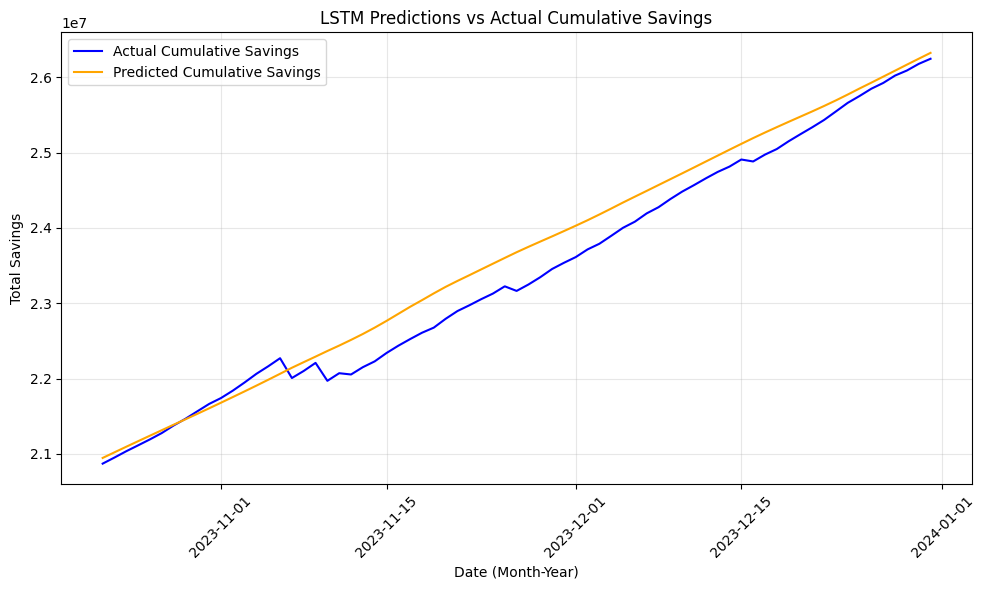

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [3]:
# Tracking Keuangan bagian analisa

import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset

data = pd.read_csv("tabungan_2.csv")

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Calculate daily savings
data['daily_savings'] = data['income'] - data['outcome']

# Prepare data for LSTM
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['daily_savings']])

# Define sequence length for time series input
sequence_length = 10

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Create sequences
X, y = create_sequences(data_scaled, sequence_length)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    tf.keras.layers.Dropout(0.2),  # Adding dropout after the first LSTM layer
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Adding dropout after the second LSTM layer
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Make predictions
predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# Prepare dates for plotting
test_dates = data['date'].iloc[-len(y_test_rescaled):]

# Calculate cumulative savings for actual and predicted values
actual_cumulative = data['daily_savings'].cumsum().iloc[-len(y_test_rescaled):]
predicted_cumulative = actual_cumulative.values[0] + np.cumsum(predictions_rescaled.flatten())

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(test_dates, actual_cumulative, label='Actual Cumulative Savings', color='blue')
plt.plot(test_dates, predicted_cumulative, label='Predicted Cumulative Savings', color='orange')
plt.title('LSTM Predictions vs Actual Cumulative Savings')
plt.xlabel('Date (Month-Year)')
plt.ylabel('Total Savings')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Forecast future daily savings
future_steps = 365  # Number of future days to forecast (1 year)
last_sequence = data_scaled[-sequence_length:]
future_predictions = []
current_sequence = last_sequence.copy()

for step in range(future_steps):
    prediction = model.predict(current_sequence[np.newaxis, :, :])[0, 0]
    # Clip predictions to avoid instability
    prediction = np.clip(prediction, scaler.data_min_[0], scaler.data_max_[0])
    future_predictions.append(prediction)
    current_sequence = np.roll(current_sequence, -1, axis=0)
    current_sequence[-1] = prediction

# Inverse transform future predictions
future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

# Calculate cumulative savings for future predictions
last_cumulative = data['daily_savings'].cumsum().iloc[-1]
cumulative_predictions = last_cumulative + np.cumsum(future_predictions_rescaled)

# Generate future dates
last_date = data['date'].iloc[-1]
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, future_steps + 1)]

# Aggregate predictions by month
future_df = pd.DataFrame({
    'date': future_dates,
    'predicted_cumulative_savings': cumulative_predictions
})
future_df['month_year'] = future_df['date'].dt.to_period('M')
monthly_forecast = future_df.groupby('month_year')['predicted_cumulative_savings'].last().reset_index()


# Display monthly forecast

print(f"Total Tabungan saat ini: {actual_cumulative.iloc[-1]}")
print("Perkiraan Total Tabungan 1 Tahun Kedepan:")
for i, row in enumerate(monthly_forecast.iterrows(), start=1):
    month, savings = row[1]['month_year'], row[1]['predicted_cumulative_savings']
    print(f"Perkiraan Total Tabungan pada bulan ke-{i}: {savings:,.2f}")
